In [1]:
import os
print(os.listdir('./kaggle_dogcat/train'))

['cats', 'dogs']


In [2]:
#import warnings
#warnings.filterwarnings('always')
#warnings.filterwarnings('ignore')

import cv2
from tqdm import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf 
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [4]:
X = []
labels = []

CATS_DIR = './kaggle_dogcat/train/cats/'
DOGS_DIR = './kaggle_dogcat/train/dogs/'

In [5]:
def assign_label(img, dogcat):
    return dogcat

In [6]:

IMG_SIZE = 120
def make_train_data(dogcat, DIR):
    for img_path in tqdm(os.listdir(DIR)):
        if img_path != 'Thumbs.db':
            label = assign_label(img_path, dogcat)
            path = os.path.join(DIR, img_path)

            img_bgr = cv2.imread(path, cv2.IMREAD_COLOR)
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))

            X.append(np.array(img))
            labels.append(str(label))
        
make_train_data('Dog', DOGS_DIR)
make_train_data('Cat', CATS_DIR)

100%|████████████████████████████████████| 2001/2001 [00:01<00:00, 1118.96it/s]


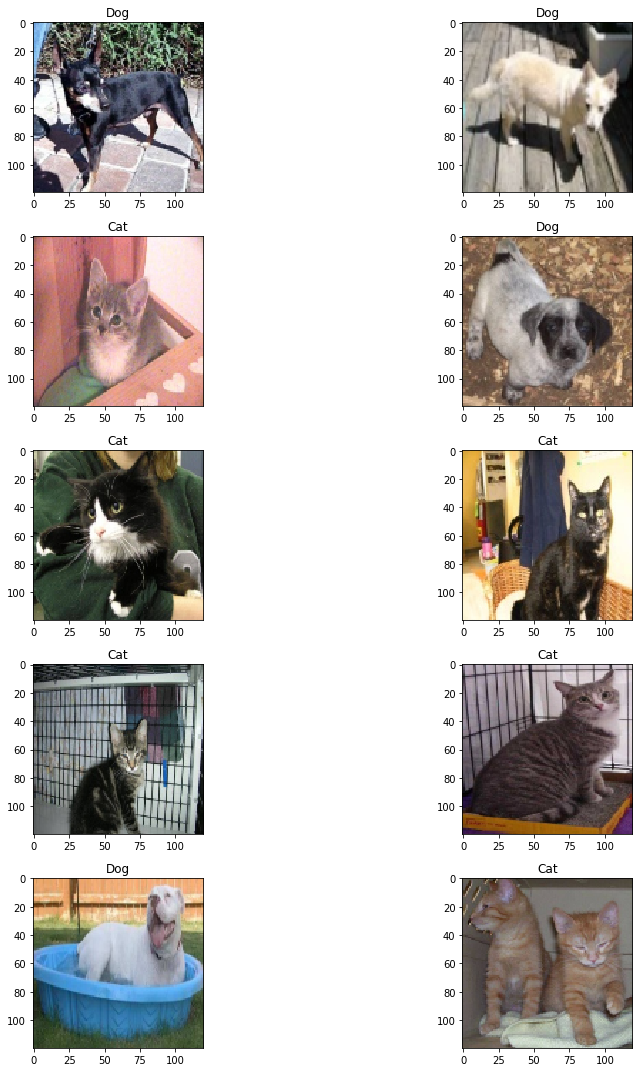

In [7]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)
for i in range(5):
    for j in range(2):
        l = random.randint(0, len(labels))
        ax[i, j].imshow(X[l])
        ax[i, j].set_title(labels[l])
        
plt.tight_layout()

In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
Y = le.fit_transform(labels)
Y = to_categorical(Y, 2)
X = np.array(X)
X = X/255

In [9]:
Y[:,0]

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, Y[:,0], test_size=0.25, shuffle=True, random_state=42)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
def build_model(input_shape, output_units=2):
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='Same',
                     input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    return model
    

In [12]:
x_train.shape

(3000, 120, 120, 3)

In [13]:
model = build_model(input_shape=(120, 120, 3))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 120, 120, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 60, 60, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [14]:
batch_size = 64
num_classes = 2
epochs = 10

In [15]:
def my_generator(x, y, batch_size=64):
    while True:
        for index in range(0, len(y), batch_size):
            images = x[index:index + batch_size]
            labels = y[index:index + batch_size]
            yield images, labels
gen = my_generator(x_train, y_train, batch_size)

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(1e-4),
              metrics=['accuracy'])

history = model.fit_generator(gen,
                              steps_per_epoch=int(len(x_train)/batch_size),
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_valid, y_valid))


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
46/46 [==============================] - ETA: 3:54 - loss: 0.8653 - acc: 0.500 - ETA: 1:57 - loss: 0.8113 - acc: 0.562 - ETA: 1:18 - loss: 0.8573 - acc: 0.520 - ETA: 58s - loss: 0.8223 - acc: 0.523 - ETA: 46s - loss: 0.8477 - acc: 0.51 - ETA: 38s - loss: 0.8532 - acc: 0.51 - ETA: 32s - loss: 0.8646 - acc: 0.50 - ETA: 28s - loss: 0.8701 - acc: 0.50 - ETA: 25s - loss: 0.8843 - acc: 0.50 - ETA: 22s - loss: 0.8656 - acc: 0.51 - ETA: 20s - loss: 0.8619 - acc: 0.51 - ETA: 18s - loss: 0.8700 - acc: 0.51 - ETA: 16s - loss: 0.8759 - acc: 0.51 - ETA: 15s - loss: 0.8751 - acc: 0.51 - ETA: 14s - loss: 0.8692 - acc: 0.52 - ETA: 12s - loss: 0.8628 - acc: 0.52 - ETA: 11s - loss: 0.8610 - acc: 0.52 - ETA: 11s - loss: 0.8628 - acc: 0.52 - ETA: 10s - loss: 0.8635 - acc: 0.52 - ETA: 9s - loss: 0.8643 - acc: 0.5266 - ETA: 8s - loss: 0.8584 - acc: 0.526 - ETA: 8s - loss: 0.8571 - acc: 0.530 - ETA: 7s - loss: 0.8537 - acc: 0.531 - ETA: 7s - loss: 0.

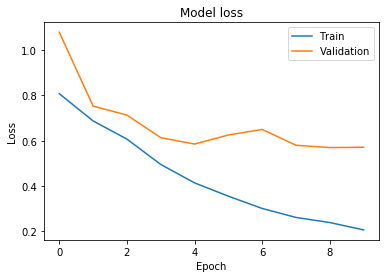

In [17]:

%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', "Validation"])

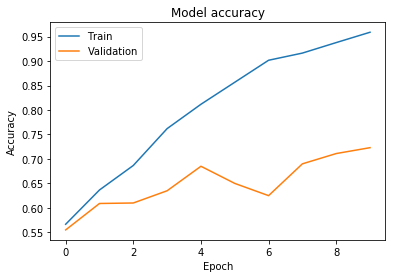

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

In [19]:
x_test = []
IMG_SIZE = 120
TEST_DIR = './kaggle_dogcat/test/'
def load_test_data(DIR):
    for img_path in tqdm(os.listdir(DIR)):
        if img_path != 'Thumbs.db':
            path = os.path.join(DIR, img_path)
            #print(img_path)

            img_bgr = cv2.imread(path, cv2.IMREAD_COLOR)
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))

            x_test.append(np.array(img))
        
load_test_data(TEST_DIR)

100%|██████████████████████████████████████| 401/401 [00:00<00:00, 1135.14it/s]


In [20]:
x_test = np.array(x_test)
x_test = x_test/255

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred

array([[3.36077034e-01],
       [6.90180361e-01],
       [9.51544583e-01],
       [3.79982024e-01],
       [6.19210482e-01],
       [3.68422508e-01],
       [1.21704608e-01],
       [1.73242837e-01],
       [6.05415583e-01],
       [9.39263821e-01],
       [1.64856315e-01],
       [9.15452063e-01],
       [5.22741377e-01],
       [7.64559209e-01],
       [3.90826017e-01],
       [7.54120708e-01],
       [9.81219709e-02],
       [3.31471205e-01],
       [6.71366870e-01],
       [7.68052816e-01],
       [6.07085109e-01],
       [7.64124036e-01],
       [4.16076660e-01],
       [9.57088411e-01],
       [6.16575837e-01],
       [1.65098906e-01],
       [8.16869318e-01],
       [7.92416930e-01],
       [5.21658123e-01],
       [2.18369335e-01],
       [4.15392518e-02],
       [2.25499362e-01],
       [5.19996703e-01],
       [7.93392539e-01],
       [3.02444994e-01],
       [2.31590867e-03],
       [7.90701151e-01],
       [5.20963550e-01],
       [6.97148919e-01],
       [4.04925793e-01],


In [23]:
import pandas as pd
ID = pd.Series(["%03d" % i for i in range(len(y_pred))])
submit = pd.DataFrame({'ID':ID, 'Predicted':y_pred[:,0]})


In [24]:
submit.head()

,ID,Predicted
0,000,0.336077
1,001,0.690180
2,002,0.951545
3,003,0.379982
4,004,0.619210


In [25]:
submit.to_csv('kaggle_dogcat_01.CSV', index=False)